In [1]:
#Imports

#data
import pandas as pd

#graph
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
path = 'C:/Users/wendr/ds enviroment/files/Business_Sales_Transaction.csv'
data = pd.read_csv(path)
data.head()

C:\Users\wendr\virtual enviroments\study\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom


***DATA ANALISYS***

In [3]:
#VERIFYING MINIMUM|MAXIMUM|AVERAGE VALUES
data.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,1.990811,9.919347,15227.893178
std,0.673649,216.662300,1716.582932
min,1.500000,-80995.000000,12004.000000
25%,1.690000,1.000000,13807.000000
50%,1.810000,3.000000,15152.000000
75%,2.120000,10.000000,16729.000000
max,98.920000,80995.000000,18287.000000


In [4]:
#INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


***DATA CLEANING***

In [5]:
#missing values
print('Missing values')
print('')
print(data.isna().sum())


# as the column that contains null values ​​is a customer identification column, it will not be possible to use statistical methods to impute values

#so the best approach will be to amputate these missing values
data_test = data.copy()
print('without missing values')
print('')
data_test.dropna(axis=1,inplace=True)

print(data_test.isna().sum())

#for some reason when I use the drop function, the customer identification column is completely eliminated even if the null values
#correspond to less than 1% of the total values

Missing values

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64
without missing values

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
Country          0
dtype: int64


In [6]:
#ELIMINATING THE MISSING DATA FROM THE CUSTOMER IDENTIFICATION COLUMN WITHOUT DELETING THE ENTIRE COLUMN
Index = data[data.CustomerNo.isna()==True].index

data.drop(Index , axis=0 , inplace=True)

In [7]:
print('Missing values after the drop')
data.isna().sum()

Missing values after the drop


TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [8]:
#TRANSFORMING THE CUSTOMER IDENTIFICATION NUMBER TO WHOLE
data.CustomerNo = data.CustomerNo.astype(int)

In [9]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850,United Kingdom
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850,United Kingdom
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850,United Kingdom
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850,United Kingdom
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850,United Kingdom


***FEATURE ENGINEERING***

In [10]:
#CREATING A NEW COLUMN WITH THE FINAL AMOUNT PAID BY THE PRODUCT SUM
data['Final_Price'] = data.Price * data.Quantity
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Final_Price
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850,United Kingdom,11.28
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850,United Kingdom,12.06
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850,United Kingdom,15.28
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850,United Kingdom,12.06
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850,United Kingdom,12.06


In [11]:
#CREATING A COLUMN WITH THE YEAR AND MONTH AND DAY
data['Year'] = data['Date'].apply(lambda x: x[0:4])
data['Month'] = data['Date'].apply(lambda x: x[5:7])
data['Day'] = data['Date'].apply(lambda x: x[9:11])
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Final_Price,Year,Month,Day
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850,United Kingdom,11.28,2018,12,1
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850,United Kingdom,12.06,2018,12,1
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850,United Kingdom,15.28,2018,12,1
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850,United Kingdom,12.06,2018,12,1
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850,United Kingdom,12.06,2018,12,1


In [13]:
#converting all Transaction data to string to avoid inconsistencies because some of these
#data contains letters

data.TransactionNo = data.TransactionNo.astype(str)

#create a column of cancellations - Canceled Transaction
# for each TransactionNo element that starts with C, a True will be inserted
# for each TransactionNo element that starts without C, a False will be inserted

data['Cancelled_Transaction'] = data['TransactionNo'].apply(lambda x: True if x[0]=='C' else False)

***HYPOTHESIS CREATION***

***hypothesis 1: 2018 was the year with most number of transation:*** False, 2019 was the year with the most number of transations

In [14]:
year_exies = data.Year.value_counts().index
year_values = data.Year.value_counts().values

<BarContainer object of 2 artists>

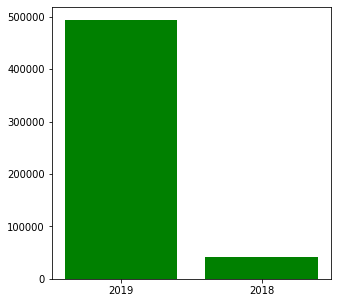

In [36]:
plt.figure(figsize=(5,5))
plt.bar(year_exies, year_values,facecolor  ='green')

***hypothesis 2: Cream Cupid Hearts Coat Hanger was the most profit product of 2019***False, was Cream Hanging Heart T-light Holder the most profit product

In [16]:
Products_of_2019 = data[data.Year=='2019']


product_axies = Products_of_2019.ProductName.value_counts().index[0:20]
product_values = Products_of_2019.ProductName.value_counts().values[0:20]

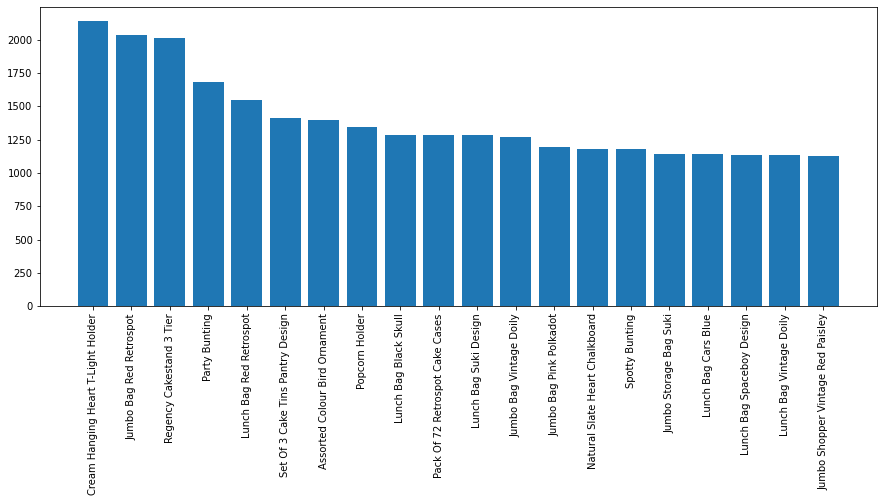

In [37]:
plt.figure(figsize=(15,5.5))
plt.bar(product_axies, product_values)
plt.xticks(rotation=90)
plt.show()

***hypothesis 3: the most part of the custumers live in United Kingdom***True, the most part of the custumers really are from United Kingdom

In [18]:
Country_axies = data.Country.value_counts().index[0:15]
Country_values = data.Country.value_counts().values[0:15]

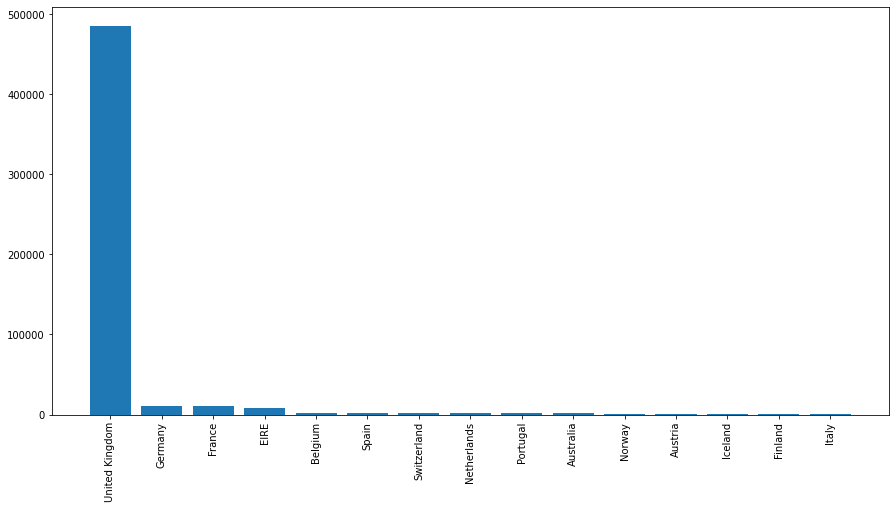

In [19]:
plt.figure(figsize=(15,7.5))
plt.bar(Country_axies, Country_values)
plt.xticks(rotation=90)
plt.show()

***hypothesis 4: december wat the most profit month*** False, november was the most profit month

In [20]:
month_axies = data.Month.value_counts().index
month_values = data.Month.value_counts().values

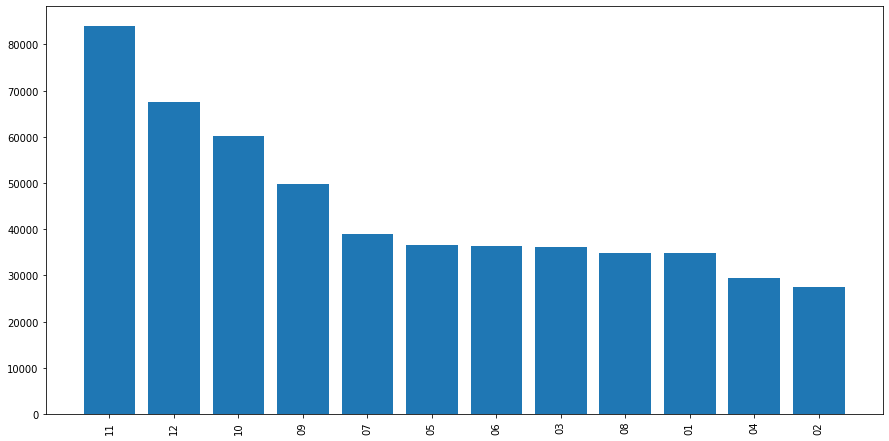

In [21]:
plt.figure(figsize=(15,7.5))
plt.bar(month_axies, month_values)
plt.xticks(rotation=90)
plt.show()

***hypothesis 5: more than 20% of customers buy more than one product in a single transaction***False, only 4.33% buy more than a product in a sigle transaction

In [22]:
#basic math will be used to find the percentage of customers who bought more than one product in a single transaction
#total customers numbers
total_customers = len(data)

#total customers numbers that buy more than a product in a single transaction
customerss_that_buy_twaice = len(data.TransactionNo.unique())

#percentage of clientes that buy more than a product in a single transaction
customers20 = ((customerss_that_buy_twaice * 100)/total_customers)

print('% of Customers that buy more than a product in a single transaction: {}%'.format(round(customers20,2)))

% of Customers that buy more than a product in a single transaction: 4.32%


***hypothesis 7: what are the products that are most often buyers together ?***

In [38]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Final_Price,Year,Month,Day,Cancelled_Transaction
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850,United Kingdom,11.28,2018,12,1,False
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850,United Kingdom,12.06,2018,12,1,False
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850,United Kingdom,15.28,2018,12,1,False
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850,United Kingdom,12.06,2018,12,1,False
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850,United Kingdom,12.06,2018,12,1,False


In [39]:
#creating a copy of the dataset keeping all the duplicated rows of the TransactionNo column
df = data[data['TransactionNo'].duplicated(keep=False)]


#creating a 'Grouped' column using the 'TransactionNo' columns as a grouper that receives the data from the 'ProductName' column they have
#the same transaction number 'TransactionNo', then it's going through a transformation method and an embedded function that will
#join common data into a single line
df['Grouped'] = df.groupby('TransactionNo')['ProductName'].transform(lambda x: ','.join(x))

#creating a new dataset that receives 'Transaction No','Grouped' and eliminates duplicate lines
df = df[['TransactionNo','Grouped']].drop_duplicates()
df.head()

C:\Users\wendr\AppData\Local\Temp\ipykernel_7444\3534956785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('TransactionNo')['ProductName'].transform(lambda x: ','.join(x))


,TransactionNo,Grouped
0,536365,"Cream Hanging Heart T-Light Holder,White Moroc..."
7,536366,"Hand Warmer Union Jack,Hand Warmer Red Retrospot"
9,536367,"Assorted Colour Bird Ornament,Poppy's Playhous..."
21,536368,"Jam Making Set With Jars,Red Coat Rack Paris F..."
26,536370,"Alarm Clock Bakelike Pink,Alarm Clock Bakelike..."


In [43]:
#required libraries

from itertools import combinations
from collections import Counter

In [46]:
#esstancing a class which is basically a countercount = Counter()
count = Counter()

#creating a flower-type loop that will receive all the data from the Grouped column
for row in df['Grouped']:
    # will receive each element and divided by the comma that will enter the list    row_list = row.split(',')
    #then it will combine the elements that are placed together
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # 2 = o numero de elementos que vai retornar junto com a contagem dessa combinação
    
#shows the 10 most common items
count.most_common(10)

[(('Green Regency Teacup And Saucer', 'Pink Regency Teacup And Saucer'), 618),
 (('Jumbo Bag Pink Polkadot', 'Jumbo Bag Red Retrospot'), 544),
 (('Green Regency Teacup And Saucer', 'Roses Regency Teacup And Saucer'), 534),
 (('Jumbo Shopper Vintage Red Paisley', 'Jumbo Bag Red Retrospot'), 467),
 (('Jumbo Storage Bag Suki', 'Jumbo Bag Red Retrospot'), 457),
 (('Lunch Bag Red Retrospot', 'Lunch Bag Black Skull'), 443),
 (('Pink Regency Teacup And Saucer', 'Roses Regency Teacup And Saucer'), 419),
 (('Alarm Clock Bakelike Green', 'Alarm Clock Bakelike Red'), 396),
 (('Jumbo Bag Red Retrospot', 'Jumbo Bag Baroque Black White'), 396),
 (('Jumbo Bag Apples', 'Jumbo Bag Red Retrospot'), 393)]

***hypothesis 8: wicht products are most cancelled ?*** Regency Cakestand 3 Tier is product the are most bean cancelled

In [23]:
#tenho que identificar os produtos que são mais cancelados
# - filtrar todos os produtos que foram cancelados
#depois criar um grafico de barras com os produtos ou os 10 mais cancelados

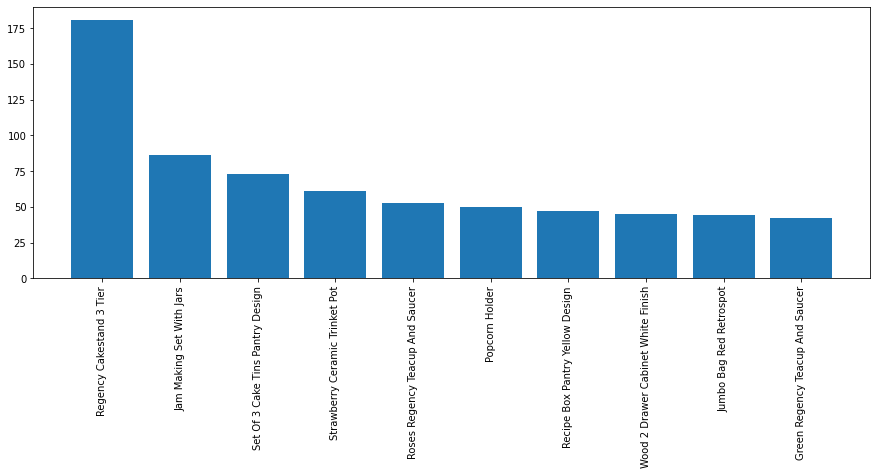

In [47]:
# - filtrar todos os produtos que foram cancelados
Cancelled_products = data[data.Cancelled_Transaction == True]

#defining the axes of the Cancelled products
eixo_x = Cancelled_products.ProductName.value_counts()[0:10].index
eixo_y = Cancelled_products.ProductName.value_counts()[0:10].values

plt.figure(figsize=(15,5))

plt.bar(eixo_x , eixo_y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.head()